In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
cars = pd.read_csv('../data/auto_mpg_cleaned.csv')

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino


## Bar Plots

Let's say you want to make a visualization to show the number of cars by origin in your dataset. First, you get use the `.value_counts()` method to generate these counts.

In [4]:
cars['origin'].value_counts()

American    245
Japanese     79
European     68
Name: origin, dtype: int64

Then you can use the `.plot()` method specifying `kind = 'bar'` to get a basic bar plot:

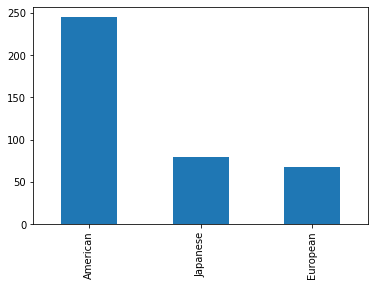

In [8]:
cars['origin'].value_counts().plot(kind = 'bar')

You can suppress the output that displays above the plot by adding a semicolon to the end of the last line.

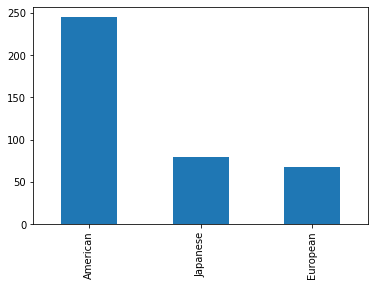

In [9]:
cars['origin'].value_counts().plot(kind = 'bar');

The default figure size can be on the small size, so if you want to make it larger, the easiest way ususally is to call `plt.figure()` prior to creating your plot and then pass a tuple to `figsize`. This tuple specifies (width, height).

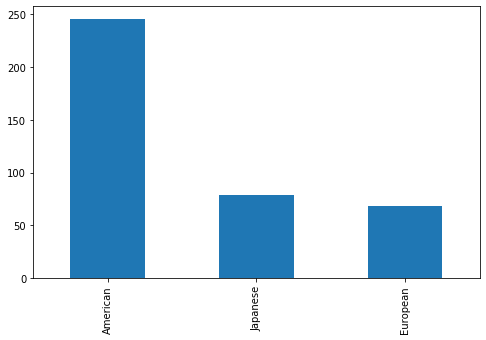

In [11]:
plt.figure(figsize = (8,5)) # sets the size of the entire plotting area as row/wide, column/tall
cars['origin'].value_counts().plot(kind = 'bar');

If you are not a fan of the default matplotlib colors, they are highly customizable. You can use the `color` argument and pass in a named color or a hex code.

A list of named colors is available at https://matplotlib.org/3.1.0/gallery/color/named_colors.html.

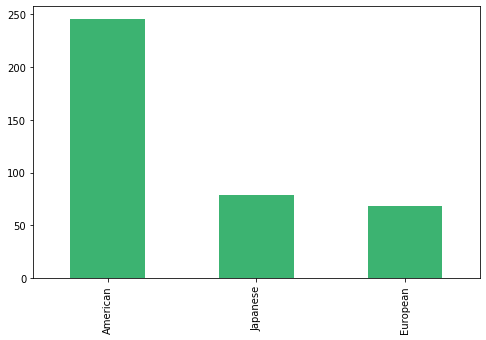

In [13]:
plt.figure(figsize = (8,5))
cars['origin'].value_counts().plot(kind = 'bar', color = 'mediumseagreen');

Having the labels rotated can be useful when there are a large number of categories, but in this case, with only 3 categories, you can use unrotated labels. 

You can modify the look of the x tick labels by using `plt.xticks()`. The `rotation` argument specifies the angle of rotation for the labels. If you have a large number of categories, you might want to used angled labels.

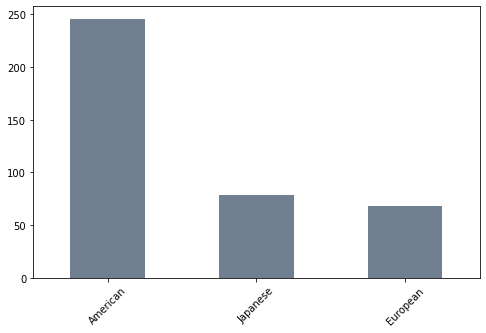

In [14]:
plt.figure(figsize = (8,5))
cars['origin'].value_counts().plot(kind = 'bar', color = 'slategray')
plt.xticks(rotation = 45);

In this case, since there are only three categories, there is enough space to have no rotation.

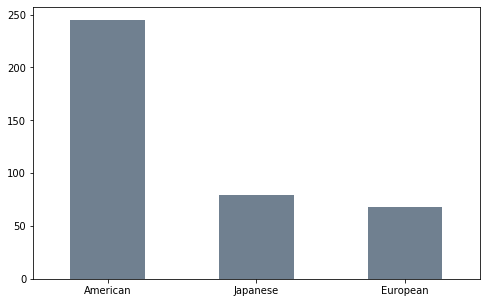

In [15]:
plt.figure(figsize = (8,5))
cars['origin'].value_counts().plot(kind = 'bar', color = 'slategray')
plt.xticks(rotation = 0);

You can also change the fontsize. It is very important when making visualization for presentations that you have large enough labels so that they can easily be read by your audience.

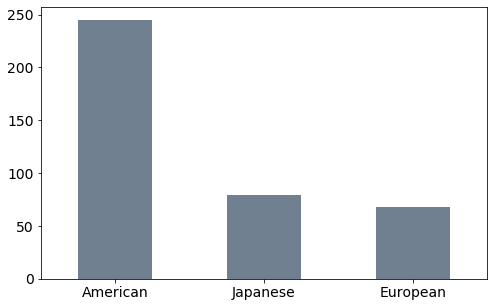

In [16]:
plt.figure(figsize = (8,5))
cars['origin'].value_counts().plot(kind = 'bar', color = 'slategray')
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14);

It is good practice to always label your axes and title your plot. Notice that you can bold text by specifying `fontweight = 'bold'`.

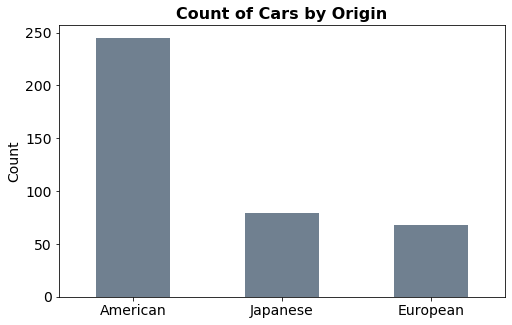

In [17]:
plt.figure(figsize = (8,5))
cars['origin'].value_counts().plot(kind = 'bar', color = 'slategray')
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of Cars by Origin', fontsize = 16, fontweight = 'bold');

Finally, sometimes the values in your dataframe are not the values that you want to show up on your plot. For example, the raw values might have underscores which you want to remove on the labels. To change the labels, for example on the x-axis, you can use `labels` argument to the xticks method. Note also that for a bar plot, you will need to specify the `ticks` argument which indicates where to put the labels. By default, the ticks appear at integer values, starting from 0.

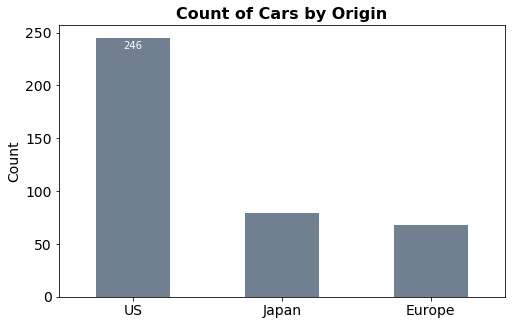

In [23]:
plt.figure(figsize = (8,5))
cars['origin'].value_counts().plot(kind = 'bar', color = 'slategray')
plt.xticks(rotation = 0, fontsize = 14, labels = ['US', 'Japan', 'Europe'], ticks = [0, 1, 2])
plt.yticks(fontsize = 14)
plt.annotate(s = '246', xy = (0, 235), ha = 'center', color = 'white') # to set the text (new version has text= instead of s=)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of Cars by Origin', fontsize = 16, fontweight = 'bold');

## Scatterplots

Now, let's look at a scatterplot. Start with a basic one.

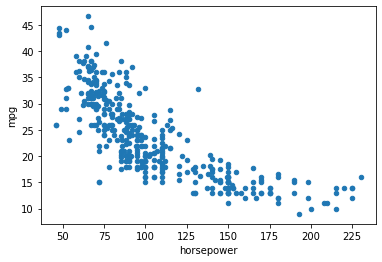

In [24]:
cars.plot(kind = 'scatter', x = 'horsepower', y = 'mpg');

What if you want to add some additional information. For example, what if you want to see the origin of each point. The easiest way to do this is to use seaborn.

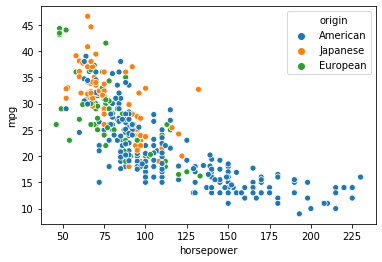

In [25]:
sns.scatterplot(data = cars, x = 'horsepower', y = 'mpg', hue = 'origin');

You can change the default colors.

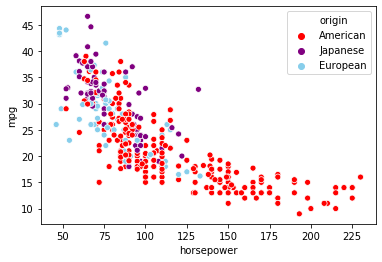

In [26]:
sns.scatterplot(data = cars, x = 'horsepower', y = 'mpg', 
                hue = 'origin', palette = ['red', 'purple', 'skyblue']);

Sometimes it makes the plot more readable to add transparency and edges on the points.

In [27]:
sns.__version__ # check version of seaborn

'0.10.0'

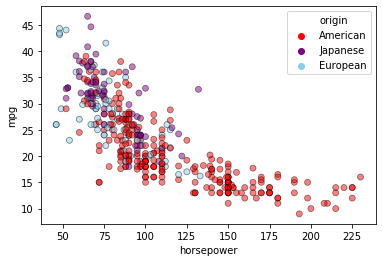

In [31]:
sns.scatterplot(data = cars, x = 'horsepower', y = 'mpg', 
                hue = 'origin', palette = ['red', 'purple', 'skyblue'],
                alpha = 0.5, edgecolor = 'black');
# alpha lets you add transparence, 1 is opaque, 0 is fully transparent
# edgecolor lets you add border to each point

You can increase the plot size, add a title, and increase the label fontsizes. 

Note that if you are using the same fontsize in multiple locations, it makes sense to set it as a variable before making your plot so that it is easier to adjust the fontsize across all elements at once if needed.

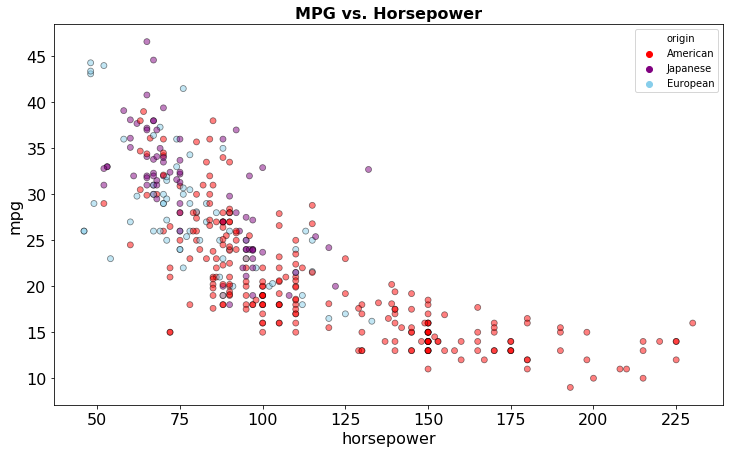

In [33]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = cars, x = 'horsepower', y = 'mpg', 
                hue = 'origin', palette = ['red', 'purple', 'skyblue'],
                alpha = 0.5, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('horsepower', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('MPG vs. Horsepower', fontsize = fontsize, fontweight = 'bold');

You can make the points larger using the `s` argument.

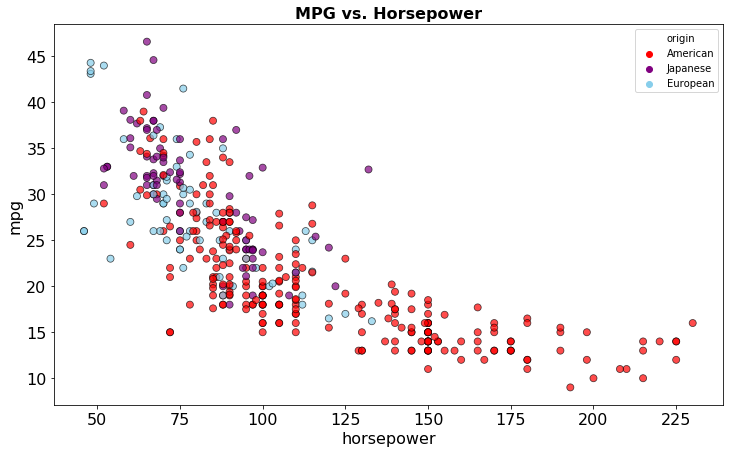

In [34]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = cars, x = 'horsepower', y = 'mpg', s = 50,
                hue = 'origin', palette = ['red', 'purple', 'skyblue'],
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('horsepower', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('MPG vs. Horsepower', fontsize = fontsize, fontweight = 'bold');

You can also modify the legend. For example, you can adjust the fontsize by specifying the `fontsize` argument.

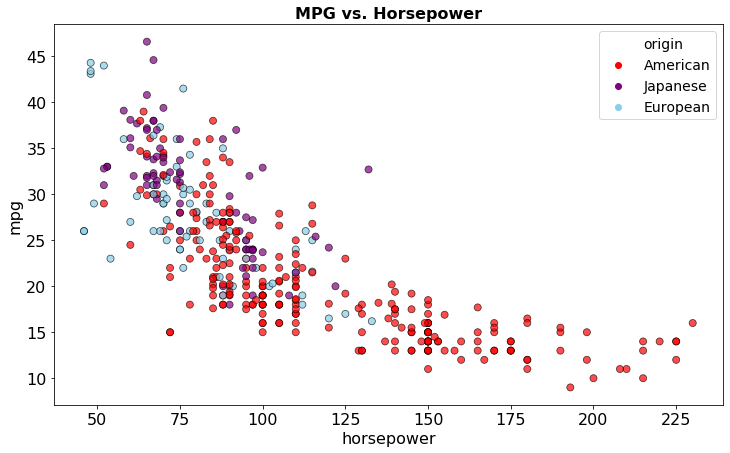

In [35]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = cars, x = 'horsepower', y = 'mpg', s = 50,
                hue = 'origin', palette = ['red', 'purple', 'skyblue'],
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('horsepower', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('MPG vs. Horsepower', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2); # many legend things you can change

Finally, it can sometimes make sense to hightlight unusual or extreme observations. In this case, there is a car that does is removed from the general trend, having higher mpg than other cars with similar horsepower values.

In [36]:
cars[(cars.horsepower > 125) & (cars.mpg > 30)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
330,32.7,6,168.0,132,2910,11.4,80,Japanese,datsun 280-zx


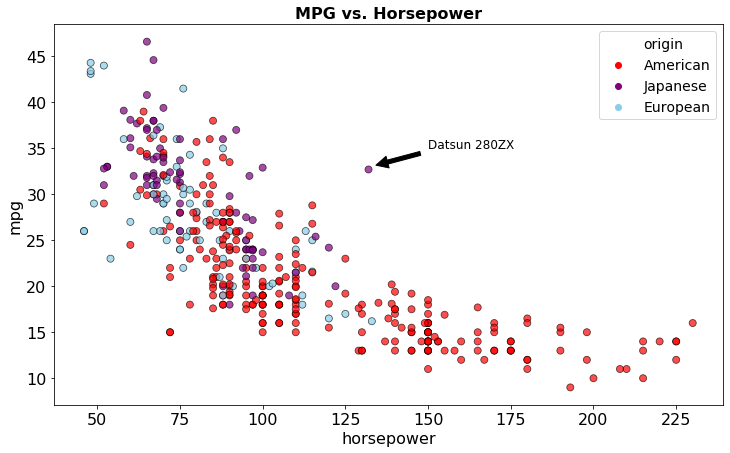

In [37]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = cars, x = 'horsepower', y = 'mpg', s = 50,
                hue = 'origin', palette = ['red', 'purple', 'skyblue'],
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('horsepower', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('MPG vs. Horsepower', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2)

plt.annotate(s = 'Datsun 280ZX', xy = (132.5, 33), fontsize = 12,
             xytext = (150, 35), arrowprops=dict(facecolor='black', shrink=0.1));

 Once you are happy with your visualization, you can export it to a png or jpg file by using `plt.savefig()`. It is usually a good idea to use `plt.tight_layout()` prior to exporting to remove any excess whitespace around the edges of the figure.

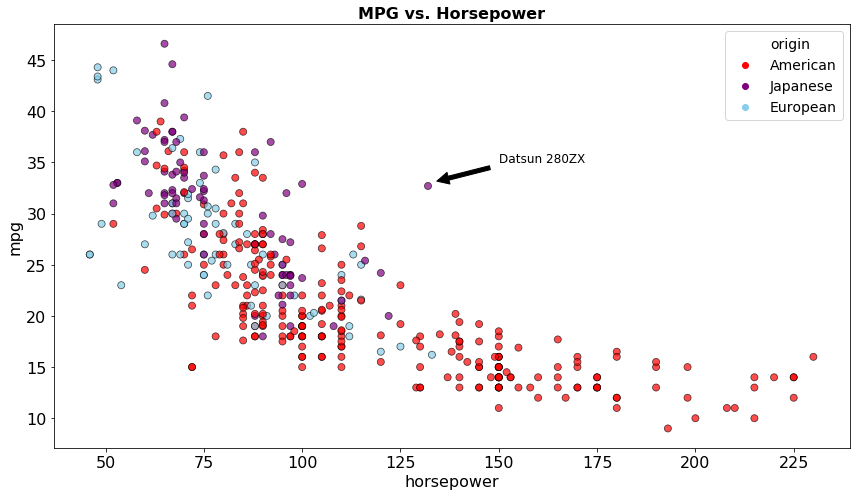

In [38]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = cars, x = 'horsepower', y = 'mpg', s = 50,
                hue = 'origin', palette = ['red', 'purple', 'skyblue'],
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('horsepower', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('MPG vs. Horsepower', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2)

plt.annotate(s = 'Datsun 280ZX', xy = (132.5, 33), fontsize = 12,
             xytext = (150, 35), arrowprops=dict(facecolor='black', shrink=0.1))

plt.tight_layout()
plt.savefig('../assets/mpg_vs_horsepower.png', dpi = 150);

## Swarmplots

Finally, let's look at how fuel economy changed over time. One option is to use a swarmplot, which will show all of the datapoints. Swarmplots are available through the seaborn module.

You can start with a basic swarmplot.

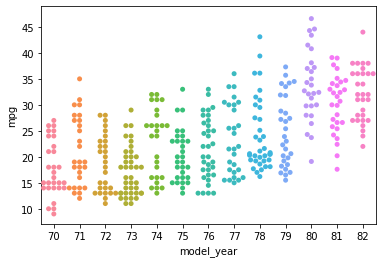

In [43]:
sns.swarmplot(data = cars, x = 'model_year', y = 'mpg');

Now, increate the figsize and add labels.

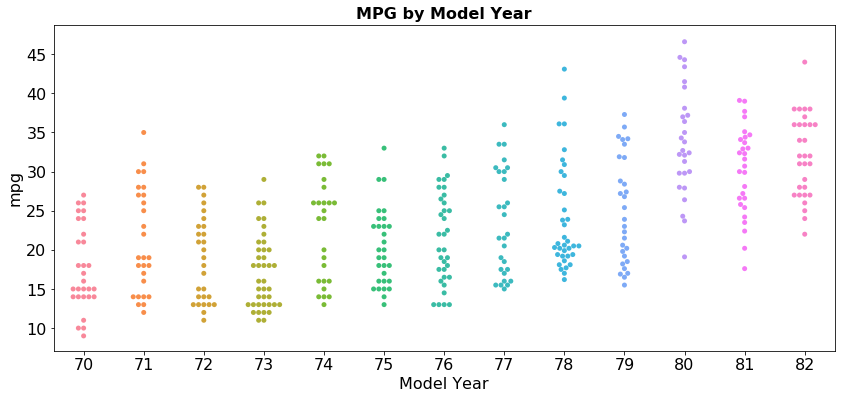

In [44]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.swarmplot(data = cars, x = 'model_year', y = 'mpg')
plt.xticks(fontsize = fontsize)
plt.xlabel('Model Year', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('MPG by Model Year', fontsize = fontsize, fontweight = 'bold');

In 1975, the Energy Policy and Conservation Act (EPCA) was passed by the United States Congress in response to the 1973 oil crisis. One aspect of this act set corporate average fuel economy standard for automobile manufacturers. By 1985, manufacturers were required to have an average fuel economy of 27.5 miles per gallon.

Suppose that you want to show how the cars in our dataset stacked up to this requirement. One way to do this would be to add a line showing the standard level. This can be done using the `plt.hlines()` function.

For this function, you need to specify the height (`y`) as well as where to start and end the line (`xmin` and `xmax`). In this case, it makes sense for the line to extend across the whole plot, so you can fetch the minimum and maximum x values using the `plt.xlim()` method. You can also set the way the line looks by setting a `linestyle`.

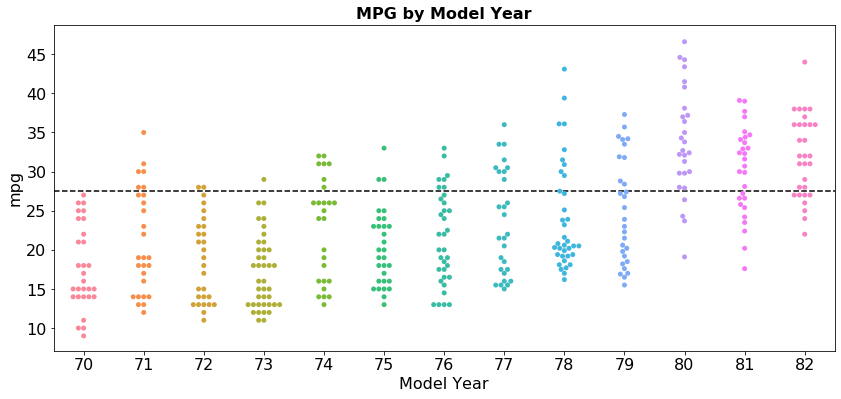

In [45]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.swarmplot(data = cars, x = 'model_year', y = 'mpg')
plt.xticks(fontsize = fontsize)
plt.xlabel('Model Year', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('MPG by Model Year', fontsize = fontsize, fontweight = 'bold')

xmin, xmax = plt.xlim()
plt.hlines(y = 27.5, xmin = xmin, xmax = xmax, linestyle = '--');

Finally, you should probably indicate what the meaning of our line is. You can do this by adding a `label` value to the `hlines()` call and then using `plt.legend()`.

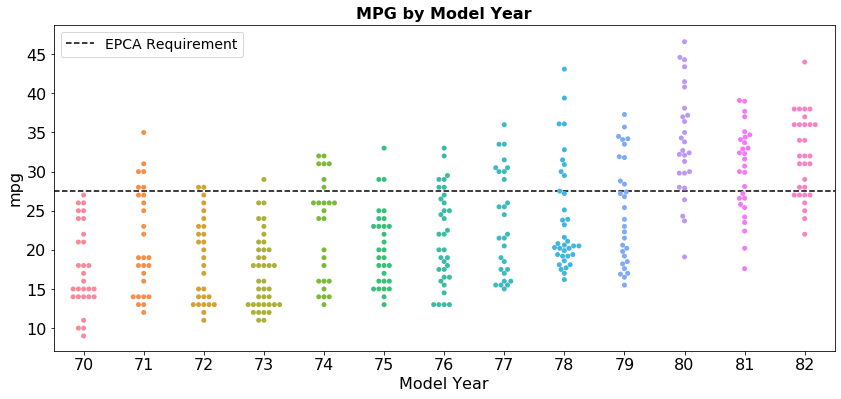

In [47]:
fontsize = 16

plt.subplots(figsize = (14, 6)) # sets up a figure, here it does the same thing as plt.figure()
sns.swarmplot(data = cars, x = 'model_year', y = 'mpg')
plt.xticks(fontsize = fontsize)
plt.xlabel('Model Year', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('mpg', fontsize = fontsize)
plt.title('MPG by Model Year', fontsize = fontsize, fontweight = 'bold')

xmin, xmax = plt.xlim()
plt.hlines(y = 27.5, xmin = xmin, xmax = xmax, linestyle = '--', label = 'EPCA Requirement')
plt.legend(loc = 'upper left', fontsize = fontsize - 2);

There are many, many ways to customize a plot using either matplotlib or seaborn.

See, for example, this demo about creating multiple plots on the same figure: https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html

### Other visualization libraries to check out:
 - [seaborn](https://seaborn.pydata.org/)
     - [DataCamp tutorial](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
 - [altair](https://altair-viz.github.io/)
     - [Jake Vanderplas tutorial](https://github.com/altair-viz/altair-tutorial)